## 网络/图(Network/Graph)
建模互相之间有关系的实体所使用的一项表达形式。
- 网络由两类对象构成：
    - 节点（Node）：表示实体
    - 边（Edge）：表示实体之间的关系
- 复杂网络：节点和边还有各自的属性（Attributes）或特征（Features）
    - 以代表人的节点为例：属性一般包括年龄、身高、体重、性别、工资等
    - 以“朋友”所代表人与人之间的关系为例：属性可能包括什么时候开始成为朋友，上次见面的时间等

## 课程参考的数据与方法
https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259

- 数据
权力的游戏（Game of Throne, GoT) 社会网络的表格数据见下表，网络的节点表示GoT中的角色人物，网络的边表示两个角色之间的关系，关系的确定是根据书中人物的名字在15个连续的单词序列中是否出现，如果出现则表示两个人物有共现关系，否则没有共现关系。

表中前两列是节点，一对源（Source）和目标（Target）节点表示两个人物之间的关联关系。GoT第一册按照上述网络构建的方法，共有187个角色（节点），684条边（人物之间的关系，表中的行数）。Weight列表示边的**权重**，表示两个角色名字的共现次数。为了让网络可控，计算的快一些，我们只考虑较强的关联关系，即weight>10，表示只保留共同出现超过10次的角色之间的关系（边），其他的边去掉。Undirected表示网络中的边是没有方向的，即边所表示的关系是对称的。

剩余的网络：
- 80个节点（角色人物）
- 175条边 （人物共现关系）

<img src='./images/game-of-throne-social-network.png'></img>

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# load data
df = pd.read_csv("data/book1.csv")
# pick only important weights (hard threshold)
df = df.loc[df['weight']>10, :]
#df = df.loc[df['Source']=='Eddard-Stark', :]
df

,Source,Target,Type,weight,book
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1
16,Aerys-II-Targaryen,Robert-Baratheon,Undirected,12,1
17,Aggo,Daenerys-Targaryen,Undirected,11,1
30,Alliser-Thorne,Jon-Snow,Undirected,32,1
...,...,...,...,...,...
658,Sandor-Clegane,Sansa-Stark,Undirected,23,1
664,Shae,Tyrion-Lannister,Undirected,12,1
666,Shagga,Tyrion-Lannister,Undirected,17,1
676,Tyrion-Lannister,Tywin-Lannister,Undirected,40,1


## Python中的网络分析工具
1. NetworkX
2. PyVis
3. Visdcc in Dash
4. Jaal


### NetworkX网络分析展示
<img src="./images/networkx.png"></img>

In [15]:
# import
import networkx as nx
# load pandas df as networkx graph
G = nx.from_pandas_edgelist(df, 
                            source='Source', 
                            target='Target', 
                            edge_attr='weight')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 80
No of connections: 175


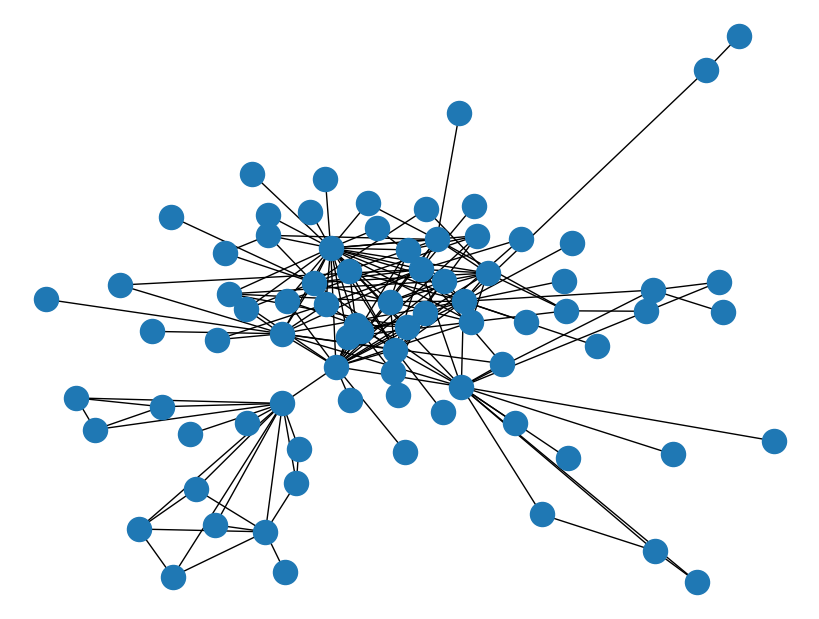

In [37]:
# all graph options
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 3

# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

### NetworkX 优缺点
- 优点：
    - 内置绘图模块
    - 大量自定义的绘图选项
    - 网络指标算法比较丰富
- 缺点：
    - 固定网络，不能交互
    - 处理的网络规模有限

### PyVis

https://pyvis.readthedocs.io/en/latest/

PyVis是一个交互式的网络可视化包，它是基于NetworkX的图，提供了多种样式选项来控制节点、边以及整个布局的样式。而且它可以直接手动拖动节点调整网络。

<img src="./images/pyvis.gif"></img>

In [38]:
# import pyvis
from pyvis.network import Network
# create vis network
net = Network(notebook=True, width=1000, height=600)
# load the networkx graph
net.from_nx(G)
# show
net.show("example.html")

### Visdcc in Dash
<img src="./images/bash.gif"></img>

In [24]:
from inspect import getmembers
for x in getmembers(nx):
    if 'draw' in x[0]:
        print(x)

('draw', <function draw at 0x107f68940>)
('draw_circular', <function draw_circular at 0x107f68ca0>)
('draw_kamada_kawai', <function draw_kamada_kawai at 0x107f68d30>)
('draw_networkx', <function draw_networkx at 0x107f689d0>)
('draw_networkx_edge_labels', <function draw_networkx_edge_labels at 0x107f68c10>)
('draw_networkx_edges', <function draw_networkx_edges at 0x107f68af0>)
('draw_networkx_labels', <function draw_networkx_labels at 0x107f68b80>)
('draw_networkx_nodes', <function draw_networkx_nodes at 0x107f68a60>)
('draw_planar', <function draw_planar at 0x107f6f040>)
('draw_random', <function draw_random at 0x107f68dc0>)
('draw_shell', <function draw_shell at 0x107f68f70>)
('draw_spectral', <function draw_spectral at 0x107f68e50>)
('draw_spring', <function draw_spring at 0x107f68ee0>)
('drawing', <module 'networkx.drawing' from '/Users/zhangguangwei/miniforge3/lib/python3.9/site-packages/networkx/drawing/__init__.py'>)
('planar_drawing', <module 'networkx.algorithms.planar_drawing

## Jaal
上述教程的作者开发的网络可视化Python包

- 教程

https://towardsdatascience.com/introducing-jaal-interacting-with-network-made-easy-124173bb4fa

- github：https://github.com/imohitmayank/jaal

<img src="./images/jaal.png"></img>

In [39]:
from jaal import Jaal
from jaal.datasets import load_got
# load the data
edge_df, node_df = load_got()
# init Jaal and run server
Jaal(edge_df, node_df).plot()

Parsing the data...Done
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_reload-hash HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_0_0m1640677876.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_0_0m1640677876.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_dash-component-suites/dash/deps/react@16.v2_0_0m1640677876.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_13_1m1640677876.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_0_0m1640677876.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:41] "GET /_dash-component-suites/dash/deps/react-dom@16.v2

No trigger


127.0.0.1 - - [28/Dec/2021 20:47:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:47:48] "POST /_dash-update-component HTTP/1.1" 200 -


No trigger


127.0.0.1 - - [28/Dec/2021 20:49:09] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:09] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:09] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:09] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:09] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:19] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:19] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:21] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:49:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.

inside color node gender


127.0.0.1 - - [28/Dec/2021 20:50:17] "POST /_dash-update-component HTTP/1.1" 200 -


inside color edge strength


127.0.0.1 - - [28/Dec/2021 20:50:20] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Dec/2021 20:50:26] "POST /_dash-update-component HTTP/1.1" 200 -


Modifying node size using  screentime


127.0.0.1 - - [28/Dec/2021 20:50:29] "POST /_dash-update-component HTTP/1.1" 200 -


Modifying edge size using  weight
